In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [3]:
# Generate synthetic data with additional features

np.random.seed(0)
n_samples = 1000
X_synthetic = np.random.rand(n_samples, 5)  # Generate random features
y_synthetic = (
    1000 * X_synthetic[:, 0]
    + 500 * X_synthetic[:, 1]
    + 300 * X_synthetic[:, 2]
    - 200 * X_synthetic[:, 3]
    + 100 * X_synthetic[:, 4]
    + np.random.normal(0, 100, n_samples)  # Generate target variable with noise
)

In [4]:
# Split the synthetic dataset into training and testing sets

X_train_synthetic, X_test_synthetic, y_train_synthetic, y_test_synthetic = train_test_split(X_synthetic, y_synthetic, test_size=0.2, random_state=42)

In [5]:
# Feature scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_synthetic)
X_test_scaled = scaler.transform(X_test_synthetic)

In [6]:
# Create a Linear Regression model

model = LinearRegression()

In [7]:
# Fit the model to the scaled training data

model.fit(X_train_scaled, y_train_synthetic)

LinearRegression()

In [8]:
# Make predictions on the scaled testing data

y_pred = model.predict(X_test_scaled)

In [9]:
# Calculate Mean Squared Error

mse = mean_squared_error(y_test_synthetic, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 9727.446603411981


In [10]:
# Cross-validation

cv_scores = cross_val_score(model, X_train_scaled, y_train_synthetic, cv=5, scoring="neg_mean_squared_error")
cv_rmse_scores = np.sqrt(-cv_scores)
print(f"Cross-Validation RMSE: {cv_rmse_scores}")

Cross-Validation RMSE: [ 96.77913264 106.63158691 103.38014794  95.62455732  99.45429129]


In [11]:
# Visualize some predictions

sample_indices = np.random.choice(len(y_test_synthetic), size=10, replace=False)
sample_X_test = X_test_scaled[sample_indices]
sample_y_test = y_test_synthetic[sample_indices]
sample_y_pred = y_pred[sample_indices]

In [12]:
# Define feature names (replace with your actual feature names)

feature_names = ['Area', 'Rooms', 'Year Built', 'Distance to Park', 'Number of Shops']

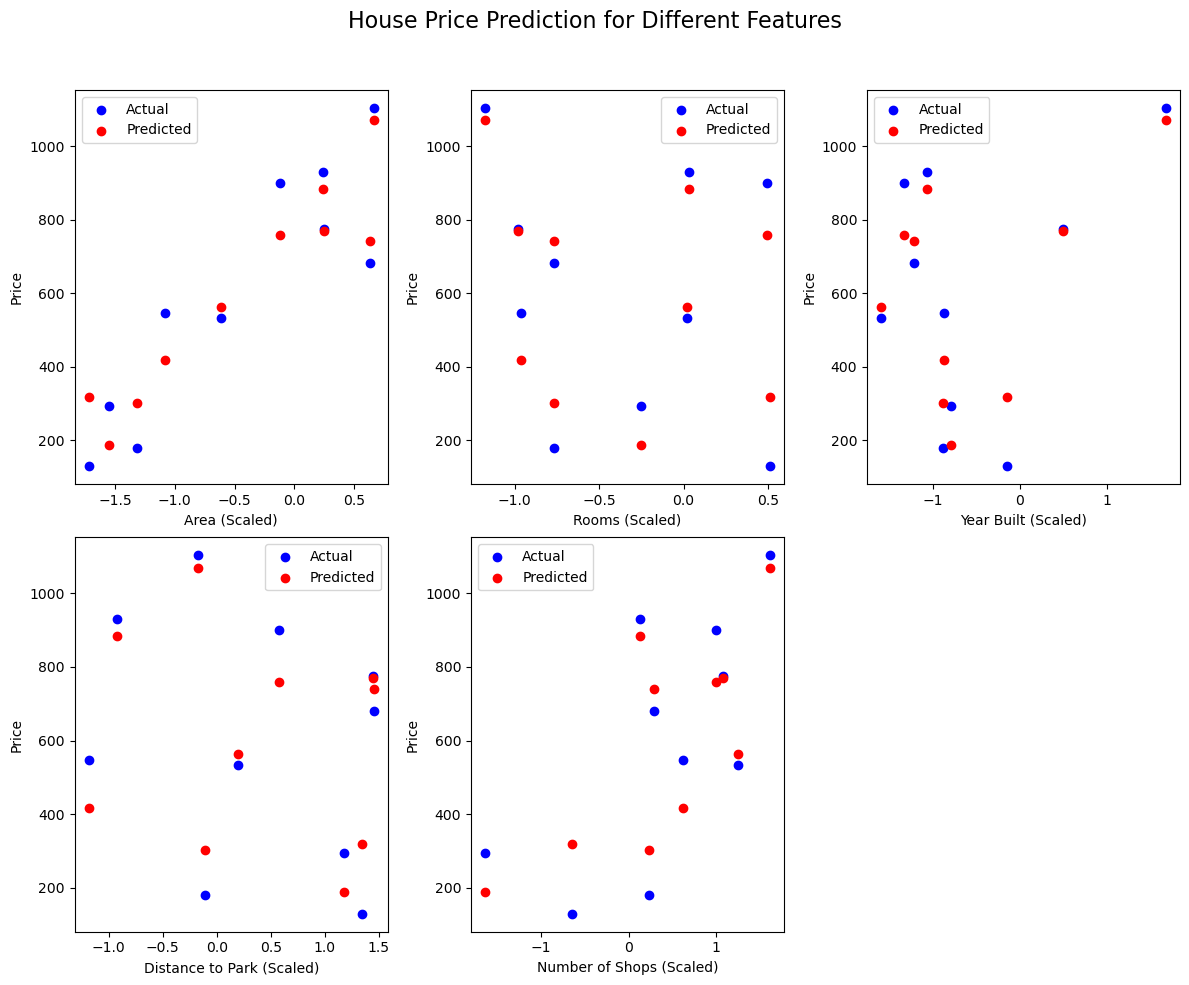

In [13]:
# Ploting

plt.figure(figsize=(12, 10))  # Set the figure size
for i in range(sample_X_test.shape[1]):
    plt.subplot(2, 3, i + 1)  # Create subplots in a 2x3 grid
    plt.scatter(sample_X_test[:, i], sample_y_test, color="blue", label="Actual")
    plt.scatter(sample_X_test[:, i], sample_y_pred, color="red", label="Predicted")
    plt.xlabel(f"{feature_names[i]} (Scaled)")
    plt.ylabel("Price")
    plt.legend()
plt.tight_layout()  # Adjust layout for better spacing
plt.subplots_adjust(top=0.9)  # Add space for super title
plt.suptitle("House Price Prediction for Different Features", fontsize=16)
plt.show()